# 1. Data Preprocessing

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ImportError: Unable to import required dependencies:
numpy: No module named 'secrets'

In [6]:
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

NameError: name 'plt' is not defined

In [7]:
df = pd.read_excel("/Users/ivanmrasov/PycharmProjects/researchstuff/результаты_курсовая_147_для_оценок.xlsx")
df.head()

NameError: name 'pd' is not defined

In [4]:
df.columns

Index(['Отметка времени', 'Укажите, на каком факультете вы учитесь.',
       'Укажите, на какой образовательной программе вы учитесь (программы отсортированы в алфавитном порядке).',
       'Укажите уровень дохода вашей семьи.',
       'В большинстве аспектов моя жизнь близка к идеалу.',
       'Условия моей жизни отличные.', 'Я доволен(-на) своей жизнью.',
       'На сегодняшний день я достиг(-ла) важных целей в жизни.',
       'Если бы я мог(-ла) начать свою жизнь заново, я почти ничего бы не изменил(-а).',
       'Сколько часов в день вы в среднем спите?',
       'Сколько раз вы болели (простудой, COVID-19, гриппом и другими заболеваниями) за последний учебный год?',
       'Оцените свой уровень физической усталости после завершения рабочего дня по шкале от 1 до 5, где 1 — очень низкий уровень усталости, 5 — очень высокий уровень усталости.',
       'Как часто за последний месяц вы были расстроены из-за чего-то, что произошло неожиданно?',
       'Как часто за последний месяц вы чув

In [5]:
df = df.drop(columns=['Адрес электронной почты',
                 'Спасибо! Если у вас есть вопросы по поводу исследования, то можете оставить их здесь или написать напрямую мне в Telegram.',
                 'Отметка времени',
                 'Укажите, на какой образовательной программе вы учитесь (программы отсортированы в алфавитном порядке).'
                 ])
df.head()

,"Укажите, на каком факультете вы учитесь.",Укажите уровень дохода вашей семьи.,В большинстве аспектов моя жизнь близка к идеалу.,Условия моей жизни отличные.,Я доволен(-на) своей жизнью.,На сегодняшний день я достиг(-ла) важных целей в жизни.,"Если бы я мог(-ла) начать свою жизнь заново, я почти ничего бы не изменил(-а).",Сколько часов в день вы в среднем спите?,"Сколько раз вы болели (простудой, COVID-19, гриппом и другими заболеваниями) за последний учебный год?","Оцените свой уровень физической усталости после завершения рабочего дня по шкале от 1 до 5, где 1 — очень низкий уровень усталости, 5 — очень высокий уровень усталости.",...,Как часто за последний месяц вы чувствовали себя уверенно в своих способностях справляться с личными проблемами?,"Как часто за последний месяц вы чувствовали, что всё идёт по вашему плану?","Как часто за последний месяц вы чувствовали, что не можете справиться со всеми вещами, которые вам необходимо сделать?",Как часто за последний месяц вы могли контролировать раздражающие факторы в вашей жизни?,"Как часто за последний месяц вы чувствовали, что контролируете ситуацию?","Как часто за последний месяц вы злились из-за вещей, которые были вне вашего контроля?","Как часто за последний месяц вы чувствовали, что трудности становились настолько непреодолимыми, что вы не могли справиться с ними?",Сколько в среднем вы тратите времени на дорогу от дома до университета / места работы? Укажите время в формате часы:минуты.,Каким видом транспорта вы преимущественно пользуетесь? Выберите 1-2 варианта ответа.,"Укажите ваш текущий GPA (средняя оценка по курсам, доступная в приложении HSE App X и в рейтинге на сайте)."
0,ФКИ (Факультет креативных индустрий),"Мы можем покупать некоторые дорогие вещи, таки...",3,5,6,7,6,7-8 часов,1-2 раза,4,...,5,4,3,4,4,2,1,00:20:00,"Метро, МЦД, Автобус, Пешком, Самокат",4.77
1,ФЭН (Факультет экономических наук),"Мы можем купить автомобиль, но не можем сказат...",5,5,4,3,2,7-8 часов,1-2 раза,3,...,3,2,5,2,2,3,4,01:10:00,"Метро, Трамвай",8.57
2,ФГН (Факультет гуманитарных наук),"Нам хватает денег на питание и одежду, покупка...",6,7,7,6,6,7-8 часов,1-2 раза,3,...,4,5,4,5,5,3,2,00:45:00,"Метро, Автобус, Пешком",7.00
3,Факультет городского и регионального развития,"Мы можем купить автомобиль, но не можем сказат...",4,3,4,5,5,6-7 часов,0 раз,3,...,4,2,4,3,2,3,1,01:00:00,"Метро, Пешком",8.27
4,ВШБ (Высшая школа бизнеса),"Мы можем купить автомобиль, но не можем сказат...",4,6,6,2,1,Больше 8 часов,1-2 раза,3,...,3,3,2,4,3,5,2,00:40:00,"Метро, Такси, Личный автомобиль",7.00


In [6]:
df.columns

Index(['Укажите, на каком факультете вы учитесь.',
       'Укажите уровень дохода вашей семьи.',
       'В большинстве аспектов моя жизнь близка к идеалу.',
       'Условия моей жизни отличные.', 'Я доволен(-на) своей жизнью.',
       'На сегодняшний день я достиг(-ла) важных целей в жизни.',
       'Если бы я мог(-ла) начать свою жизнь заново, я почти ничего бы не изменил(-а).',
       'Сколько часов в день вы в среднем спите?',
       'Сколько раз вы болели (простудой, COVID-19, гриппом и другими заболеваниями) за последний учебный год?',
       'Оцените свой уровень физической усталости после завершения рабочего дня по шкале от 1 до 5, где 1 — очень низкий уровень усталости, 5 — очень высокий уровень усталости.',
       'Как часто за последний месяц вы были расстроены из-за чего-то, что произошло неожиданно?',
       'Как часто за последний месяц вы чувствовали, что неспособны контролировать важные вещи в вашей жизни?',
       'Как часто за последний месяц вы чувствовали себя нервно

In [7]:
df = df.rename(columns={
    'Укажите, на каком факультете вы учитесь.': 'faculty',
    'Укажите уровень дохода вашей семьи.': 'income_level',
    'Сколько часов в день вы в среднем спите?': 'sleeping_hours',
    'Сколько раз вы болели (простудой, COVID-19, гриппом и другими заболеваниями) за последний учебный год?': 'sickness_count',
    'Сколько в среднем вы тратите времени на дорогу от дома до университета / места работы? Укажите время в формате часы:минуты.': 'commute_time',
    'Укажите ваш текущий GPA (средняя оценка по курсам, доступная в приложении HSE App X и в рейтинге на сайте).': 'gpa',
    'Оцените свой уровень физической усталости после завершения рабочего дня по шкале от 1 до 5, где 1 — очень низкий уровень усталости, 5 — очень высокий уровень усталости.': 'tiredness',
    'Каким видом транспорта вы преимущественно пользуетесь? Выберите 1-2 варианта ответа.': 'modes_transportation'
})
df.head()

,faculty,income_level,В большинстве аспектов моя жизнь близка к идеалу.,Условия моей жизни отличные.,Я доволен(-на) своей жизнью.,На сегодняшний день я достиг(-ла) важных целей в жизни.,"Если бы я мог(-ла) начать свою жизнь заново, я почти ничего бы не изменил(-а).",sleeping_hours,sickness_count,tiredness,...,Как часто за последний месяц вы чувствовали себя уверенно в своих способностях справляться с личными проблемами?,"Как часто за последний месяц вы чувствовали, что всё идёт по вашему плану?","Как часто за последний месяц вы чувствовали, что не можете справиться со всеми вещами, которые вам необходимо сделать?",Как часто за последний месяц вы могли контролировать раздражающие факторы в вашей жизни?,"Как часто за последний месяц вы чувствовали, что контролируете ситуацию?","Как часто за последний месяц вы злились из-за вещей, которые были вне вашего контроля?","Как часто за последний месяц вы чувствовали, что трудности становились настолько непреодолимыми, что вы не могли справиться с ними?",commute_time,modes_transportation,gpa
0,ФКИ (Факультет креативных индустрий),"Мы можем покупать некоторые дорогие вещи, таки...",3,5,6,7,6,7-8 часов,1-2 раза,4,...,5,4,3,4,4,2,1,00:20:00,"Метро, МЦД, Автобус, Пешком, Самокат",4.77
1,ФЭН (Факультет экономических наук),"Мы можем купить автомобиль, но не можем сказат...",5,5,4,3,2,7-8 часов,1-2 раза,3,...,3,2,5,2,2,3,4,01:10:00,"Метро, Трамвай",8.57
2,ФГН (Факультет гуманитарных наук),"Нам хватает денег на питание и одежду, покупка...",6,7,7,6,6,7-8 часов,1-2 раза,3,...,4,5,4,5,5,3,2,00:45:00,"Метро, Автобус, Пешком",7.00
3,Факультет городского и регионального развития,"Мы можем купить автомобиль, но не можем сказат...",4,3,4,5,5,6-7 часов,0 раз,3,...,4,2,4,3,2,3,1,01:00:00,"Метро, Пешком",8.27
4,ВШБ (Высшая школа бизнеса),"Мы можем купить автомобиль, но не можем сказат...",4,6,6,2,1,Больше 8 часов,1-2 раза,3,...,3,3,2,4,3,5,2,00:40:00,"Метро, Такси, Личный автомобиль",7.00


In [8]:
swls_questions = [2, 3, 4, 5, 6]
df['swls'] = df.iloc[:, swls_questions].sum(axis=1)
df = df.drop(df.columns[swls_questions], axis=1)
df.head()

,faculty,income_level,sleeping_hours,sickness_count,tiredness,"Как часто за последний месяц вы были расстроены из-за чего-то, что произошло неожиданно?","Как часто за последний месяц вы чувствовали, что неспособны контролировать важные вещи в вашей жизни?",Как часто за последний месяц вы чувствовали себя нервно и напряженно?,Как часто за последний месяц вы чувствовали себя уверенно в своих способностях справляться с личными проблемами?,"Как часто за последний месяц вы чувствовали, что всё идёт по вашему плану?","Как часто за последний месяц вы чувствовали, что не можете справиться со всеми вещами, которые вам необходимо сделать?",Как часто за последний месяц вы могли контролировать раздражающие факторы в вашей жизни?,"Как часто за последний месяц вы чувствовали, что контролируете ситуацию?","Как часто за последний месяц вы злились из-за вещей, которые были вне вашего контроля?","Как часто за последний месяц вы чувствовали, что трудности становились настолько непреодолимыми, что вы не могли справиться с ними?",commute_time,modes_transportation,gpa,swls
0,ФКИ (Факультет креативных индустрий),"Мы можем покупать некоторые дорогие вещи, таки...",7-8 часов,1-2 раза,4,2,2,3,5,4,3,4,4,2,1,00:20:00,"Метро, МЦД, Автобус, Пешком, Самокат",4.77,27
1,ФЭН (Факультет экономических наук),"Мы можем купить автомобиль, но не можем сказат...",7-8 часов,1-2 раза,3,2,4,3,3,2,5,2,2,3,4,01:10:00,"Метро, Трамвай",8.57,19
2,ФГН (Факультет гуманитарных наук),"Нам хватает денег на питание и одежду, покупка...",7-8 часов,1-2 раза,3,3,4,2,4,5,4,5,5,3,2,00:45:00,"Метро, Автобус, Пешком",7.00,32
3,Факультет городского и регионального развития,"Мы можем купить автомобиль, но не можем сказат...",6-7 часов,0 раз,3,1,1,4,4,2,4,3,2,3,1,01:00:00,"Метро, Пешком",8.27,21
4,ВШБ (Высшая школа бизнеса),"Мы можем купить автомобиль, но не можем сказат...",Больше 8 часов,1-2 раза,3,3,4,4,3,3,2,4,3,5,2,00:40:00,"Метро, Такси, Личный автомобиль",7.00,19


PSS 10 questions


final df: faculty, sleeping_hours, sickness_count, swls, pss, commute_time, gpa

In [9]:
def reverse_value(value):
    return abs(value - 6)

columns_for_reverse = ['Как часто за последний месяц вы чувствовали себя уверенно в своих способностях справляться с личными проблемами?',
                       'Как часто за последний месяц вы чувствовали, что всё идёт по вашему плану?',
                       'Как часто за последний месяц вы могли контролировать раздражающие факторы в вашей жизни?',
                       'Как часто за последний месяц вы чувствовали, что контролируете ситуацию?']

df[columns_for_reverse] = df[columns_for_reverse].map(reverse_value)
df.head()

,faculty,income_level,sleeping_hours,sickness_count,tiredness,"Как часто за последний месяц вы были расстроены из-за чего-то, что произошло неожиданно?","Как часто за последний месяц вы чувствовали, что неспособны контролировать важные вещи в вашей жизни?",Как часто за последний месяц вы чувствовали себя нервно и напряженно?,Как часто за последний месяц вы чувствовали себя уверенно в своих способностях справляться с личными проблемами?,"Как часто за последний месяц вы чувствовали, что всё идёт по вашему плану?","Как часто за последний месяц вы чувствовали, что не можете справиться со всеми вещами, которые вам необходимо сделать?",Как часто за последний месяц вы могли контролировать раздражающие факторы в вашей жизни?,"Как часто за последний месяц вы чувствовали, что контролируете ситуацию?","Как часто за последний месяц вы злились из-за вещей, которые были вне вашего контроля?","Как часто за последний месяц вы чувствовали, что трудности становились настолько непреодолимыми, что вы не могли справиться с ними?",commute_time,modes_transportation,gpa,swls
0,ФКИ (Факультет креативных индустрий),"Мы можем покупать некоторые дорогие вещи, таки...",7-8 часов,1-2 раза,4,2,2,3,1,2,3,2,2,2,1,00:20:00,"Метро, МЦД, Автобус, Пешком, Самокат",4.77,27
1,ФЭН (Факультет экономических наук),"Мы можем купить автомобиль, но не можем сказат...",7-8 часов,1-2 раза,3,2,4,3,3,4,5,4,4,3,4,01:10:00,"Метро, Трамвай",8.57,19
2,ФГН (Факультет гуманитарных наук),"Нам хватает денег на питание и одежду, покупка...",7-8 часов,1-2 раза,3,3,4,2,2,1,4,1,1,3,2,00:45:00,"Метро, Автобус, Пешком",7.00,32
3,Факультет городского и регионального развития,"Мы можем купить автомобиль, но не можем сказат...",6-7 часов,0 раз,3,1,1,4,2,4,4,3,4,3,1,01:00:00,"Метро, Пешком",8.27,21
4,ВШБ (Высшая школа бизнеса),"Мы можем купить автомобиль, но не можем сказат...",Больше 8 часов,1-2 раза,3,3,4,4,3,3,2,2,3,5,2,00:40:00,"Метро, Такси, Личный автомобиль",7.00,19


In [10]:
pss_questions = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
df['pss'] = df.iloc[:, pss_questions].sum(axis=1)
df['pss'] = df['pss'].apply(lambda x: x-10)
df = df.drop(df.columns[pss_questions], axis=1)
df.head()

,faculty,income_level,sleeping_hours,sickness_count,tiredness,commute_time,modes_transportation,gpa,swls,pss
0,ФКИ (Факультет креативных индустрий),"Мы можем покупать некоторые дорогие вещи, таки...",7-8 часов,1-2 раза,4,00:20:00,"Метро, МЦД, Автобус, Пешком, Самокат",4.77,27,10
1,ФЭН (Факультет экономических наук),"Мы можем купить автомобиль, но не можем сказат...",7-8 часов,1-2 раза,3,01:10:00,"Метро, Трамвай",8.57,19,26
2,ФГН (Факультет гуманитарных наук),"Нам хватает денег на питание и одежду, покупка...",7-8 часов,1-2 раза,3,00:45:00,"Метро, Автобус, Пешком",7.00,32,13
3,Факультет городского и регионального развития,"Мы можем купить автомобиль, но не можем сказат...",6-7 часов,0 раз,3,01:00:00,"Метро, Пешком",8.27,21,17
4,ВШБ (Высшая школа бизнеса),"Мы можем купить автомобиль, но не можем сказат...",Больше 8 часов,1-2 раза,3,00:40:00,"Метро, Такси, Личный автомобиль",7.00,19,21


In [11]:
scales = {
    'income_level': ['Нам не хватает денег даже на питание',
                     'Нам хватает денег на питание, но не хватает на одежду',
                     'Нам хватает денег на питание и одежду, покупка более дорогих вещей, таких как телевизор или холодильник, вызывает у нас проблемы',
                     'Мы можем покупать некоторые дорогие вещи, такие как холодильник или телевизор, но не можем купить автомобиль',
                     'Мы можем купить автомобиль, но не можем сказать, что не стеснены в средствах',
                     'Мы можем ни в чем себе не отказывать'],
    'sleeping_hours': ['Меньше 6 часов',
                             '6-7 часов',
                             '7-8 часов',
                             'Больше 8 часов'],
    'sickness_count': ['0 раз', 
                             '1-2 раза', 
                             '3-4 раза', 
                             'Больше 4 раз']
}

encoder = OrdinalEncoder()

for column, scale in scales.items():
    encoder.categories_ = [scale]
    df[column] = encoder.fit_transform(df[[column]])

df.head()

,faculty,income_level,sleeping_hours,sickness_count,tiredness,commute_time,modes_transportation,gpa,swls,pss
0,ФКИ (Факультет креативных индустрий),2.0,1.0,1.0,4,00:20:00,"Метро, МЦД, Автобус, Пешком, Самокат",4.77,27,10
1,ФЭН (Факультет экономических наук),0.0,1.0,1.0,3,01:10:00,"Метро, Трамвай",8.57,19,26
2,ФГН (Факультет гуманитарных наук),4.0,1.0,1.0,3,00:45:00,"Метро, Автобус, Пешком",7.00,32,13
3,Факультет городского и регионального развития,0.0,0.0,0.0,3,01:00:00,"Метро, Пешком",8.27,21,17
4,ВШБ (Высшая школа бизнеса),0.0,2.0,1.0,3,00:40:00,"Метро, Такси, Личный автомобиль",7.00,19,21


In [12]:
def time_to_minutes(time):
    return time.hour * 60 + time.minute

df['commute_time'] = df['commute_time'].apply(time_to_minutes)
df.head()

,faculty,income_level,sleeping_hours,sickness_count,tiredness,commute_time,modes_transportation,gpa,swls,pss
0,ФКИ (Факультет креативных индустрий),2.0,1.0,1.0,4,20,"Метро, МЦД, Автобус, Пешком, Самокат",4.77,27,10
1,ФЭН (Факультет экономических наук),0.0,1.0,1.0,3,70,"Метро, Трамвай",8.57,19,26
2,ФГН (Факультет гуманитарных наук),4.0,1.0,1.0,3,45,"Метро, Автобус, Пешком",7.00,32,13
3,Факультет городского и регионального развития,0.0,0.0,0.0,3,60,"Метро, Пешком",8.27,21,17
4,ВШБ (Высшая школа бизнеса),0.0,2.0,1.0,3,40,"Метро, Такси, Личный автомобиль",7.00,19,21


# 2. Exploratory Data Analysis

In [13]:
df.describe()

,income_level,sleeping_hours,sickness_count,tiredness,commute_time,gpa,swls,pss
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.652778,0.972222,1.041667,3.430556,64.402778,7.548819,23.326389,21.187500
std,1.425637,0.960364,0.635489,0.936089,28.572646,1.280582,6.146043,7.452384
min,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,6.000000,3.000000
25%,0.000000,0.000000,1.000000,3.000000,45.000000,6.797500,19.750000,16.000000
50%,2.000000,1.000000,1.000000,3.000000,60.000000,7.775000,24.000000,21.000000
75%,2.000000,1.000000,1.000000,4.000000,80.000000,8.500000,27.000000,27.000000
max,5.000000,3.000000,3.000000,5.000000,180.000000,9.570000,35.000000,40.000000


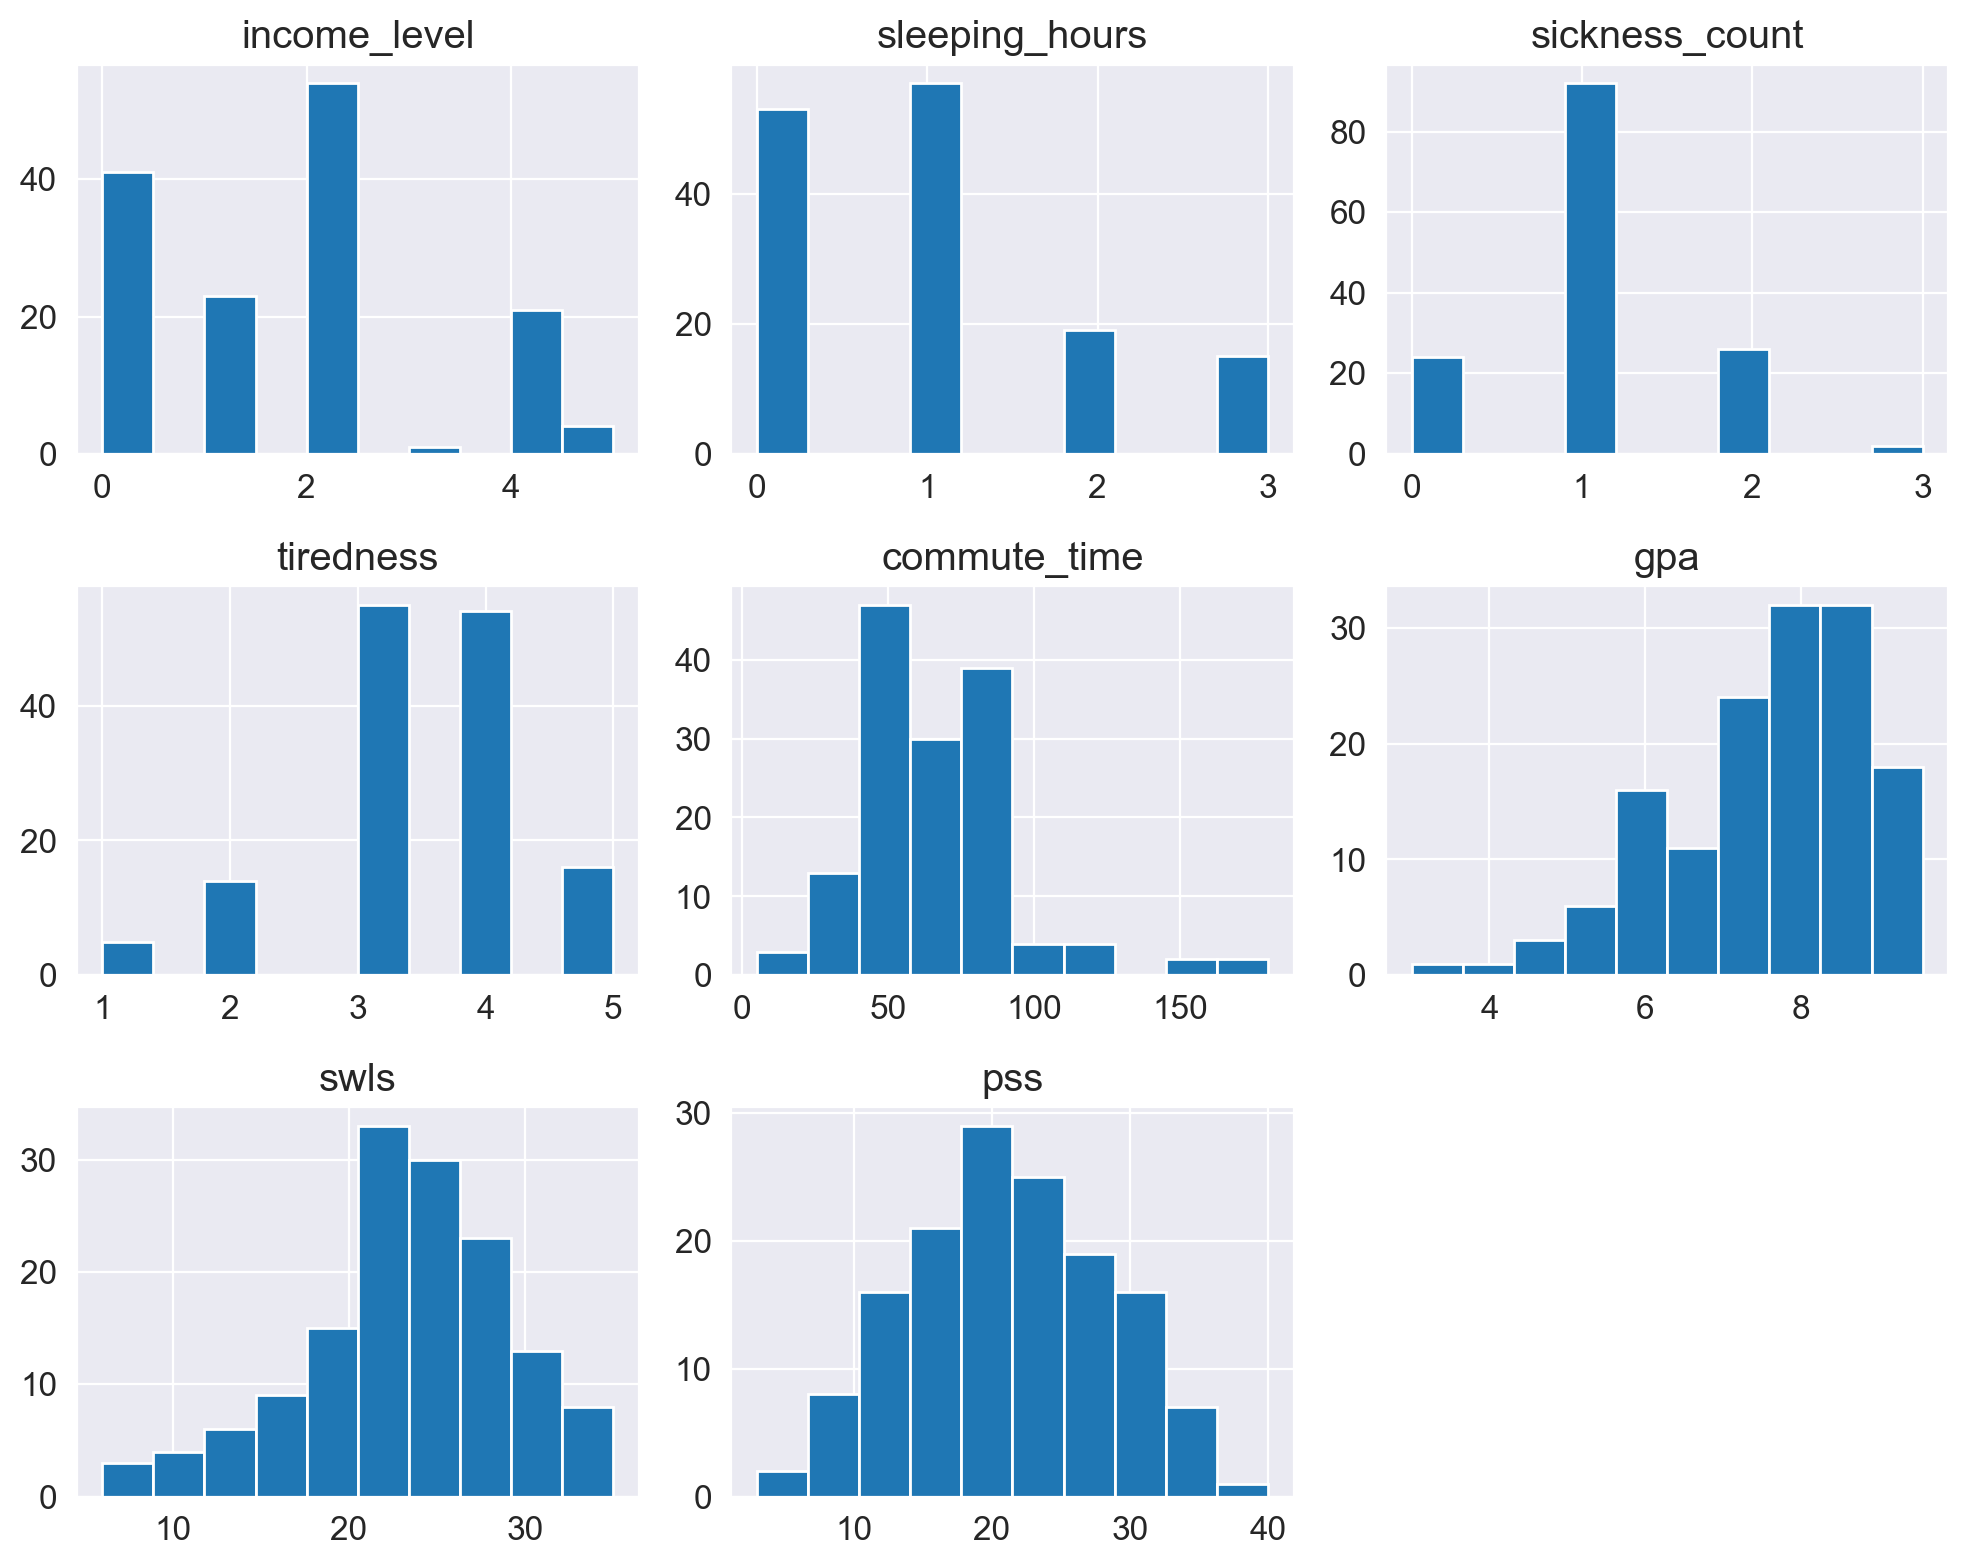

In [14]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [15]:
numeric_df.skew()

income_level      0.574602
sleeping_hours    0.776558
sickness_count    0.297621
tiredness        -0.392040
commute_time      1.371383
gpa              -0.820764
swls             -0.547354
pss               0.028249
dtype: float64

In [16]:
numeric_df['commute_time'] = numeric_df['commute_time'].apply(lambda x: np.log(x))

In [17]:
numeric_df.skew()

income_level      0.574602
sleeping_hours    0.776558
sickness_count    0.297621
tiredness        -0.392040
commute_time     -0.979238
gpa              -0.820764
swls             -0.547354
pss               0.028249
dtype: float64

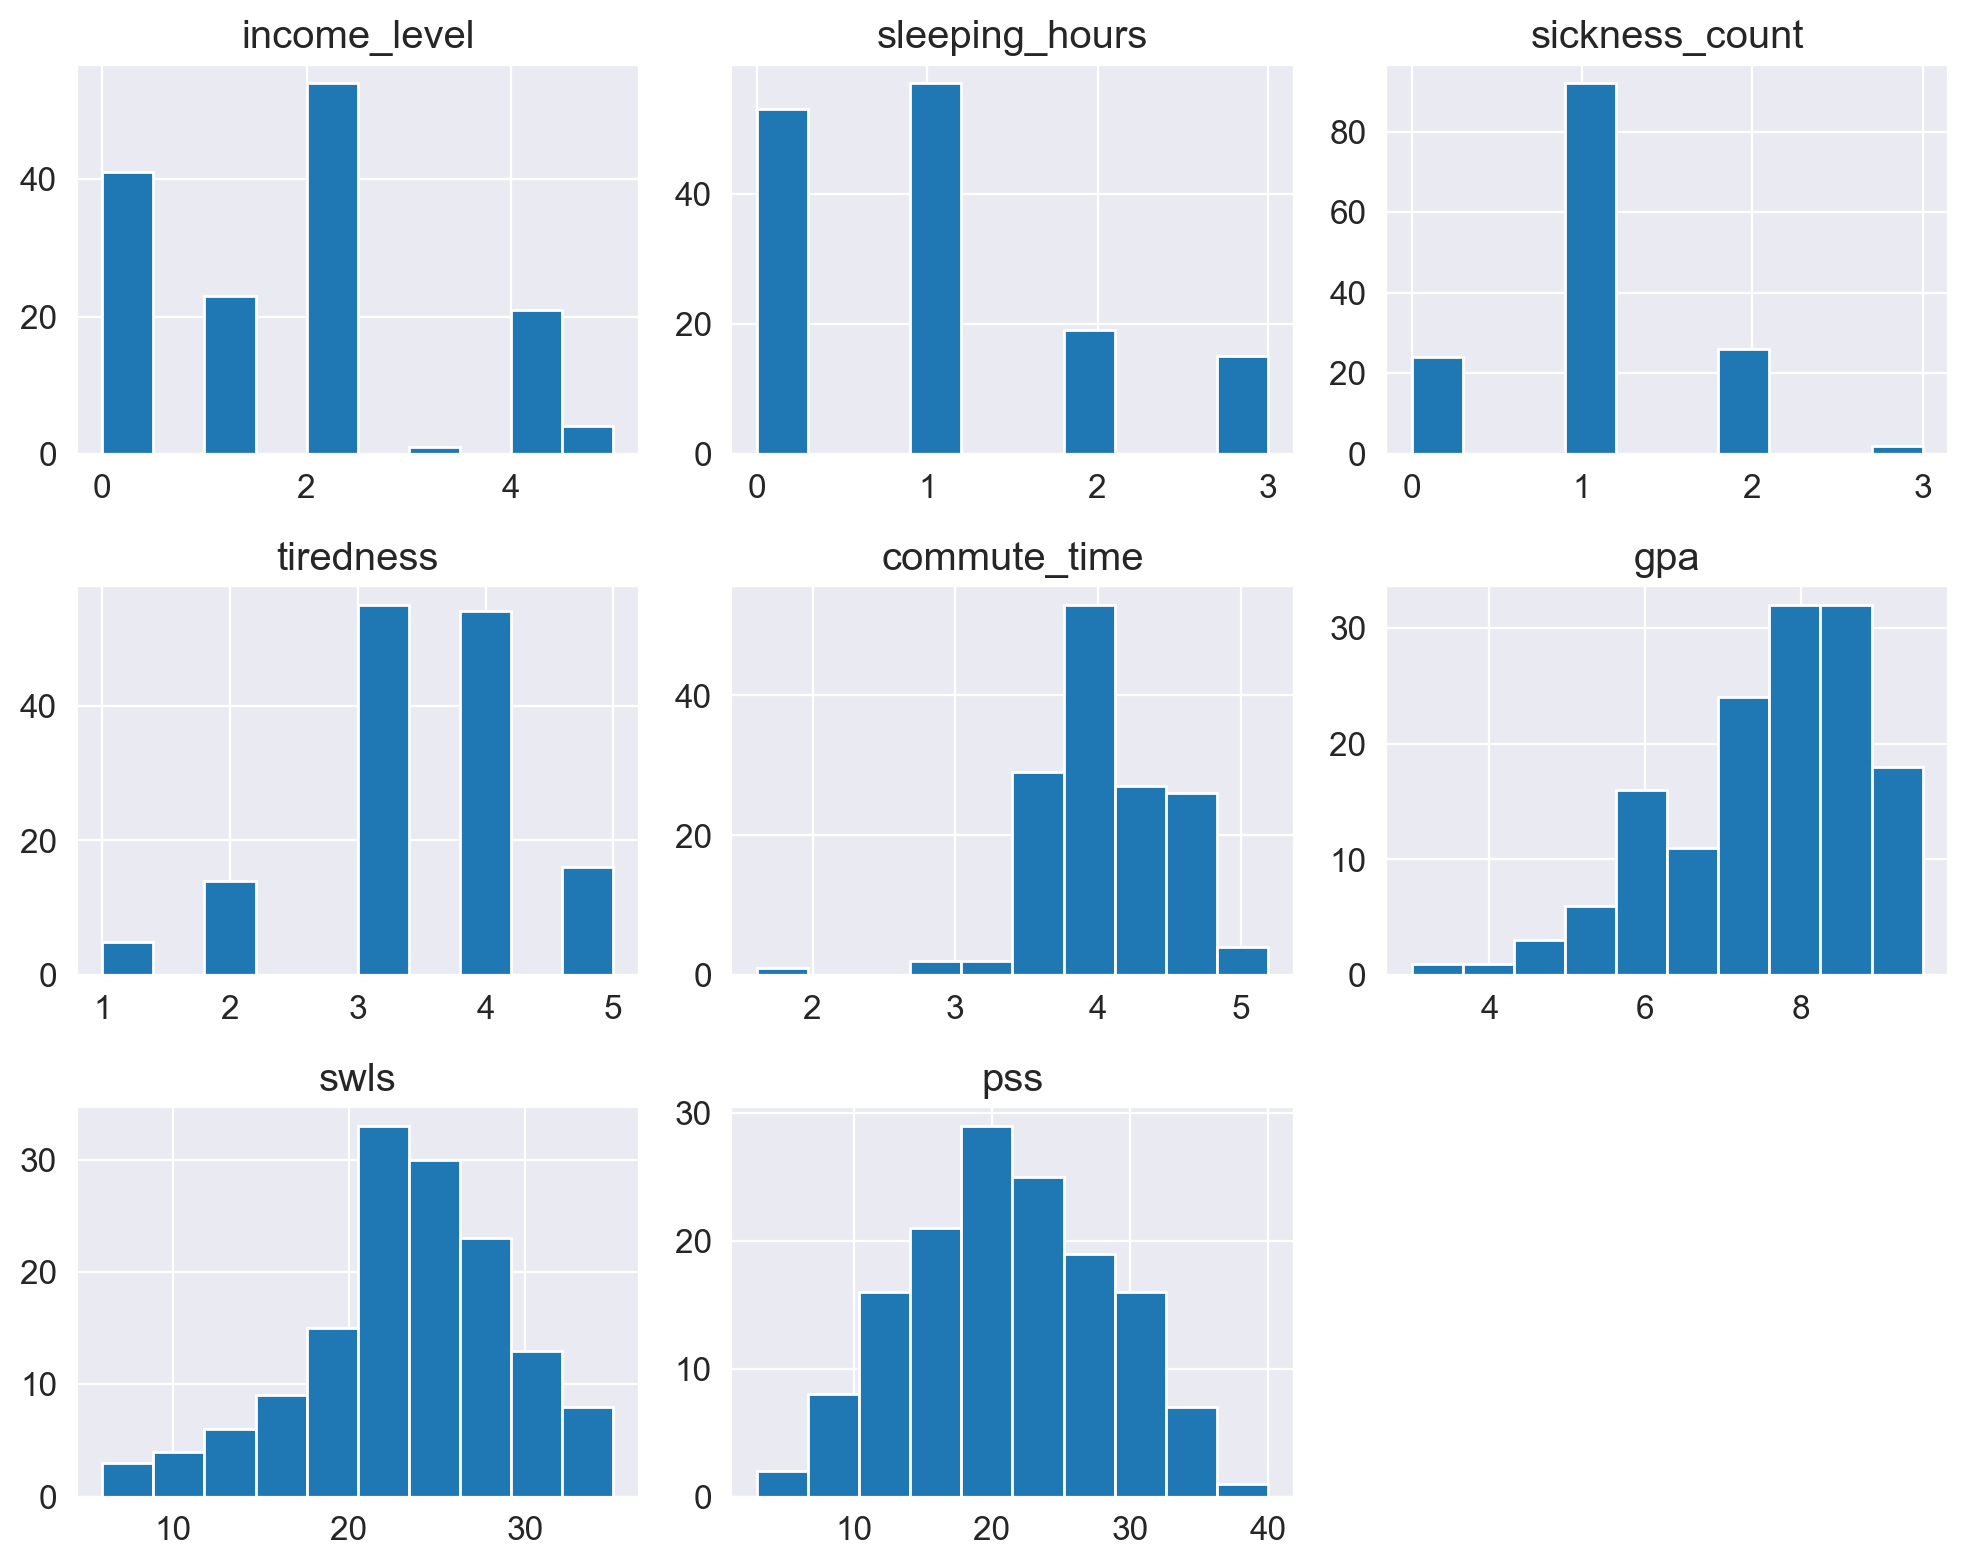

In [18]:
numeric_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

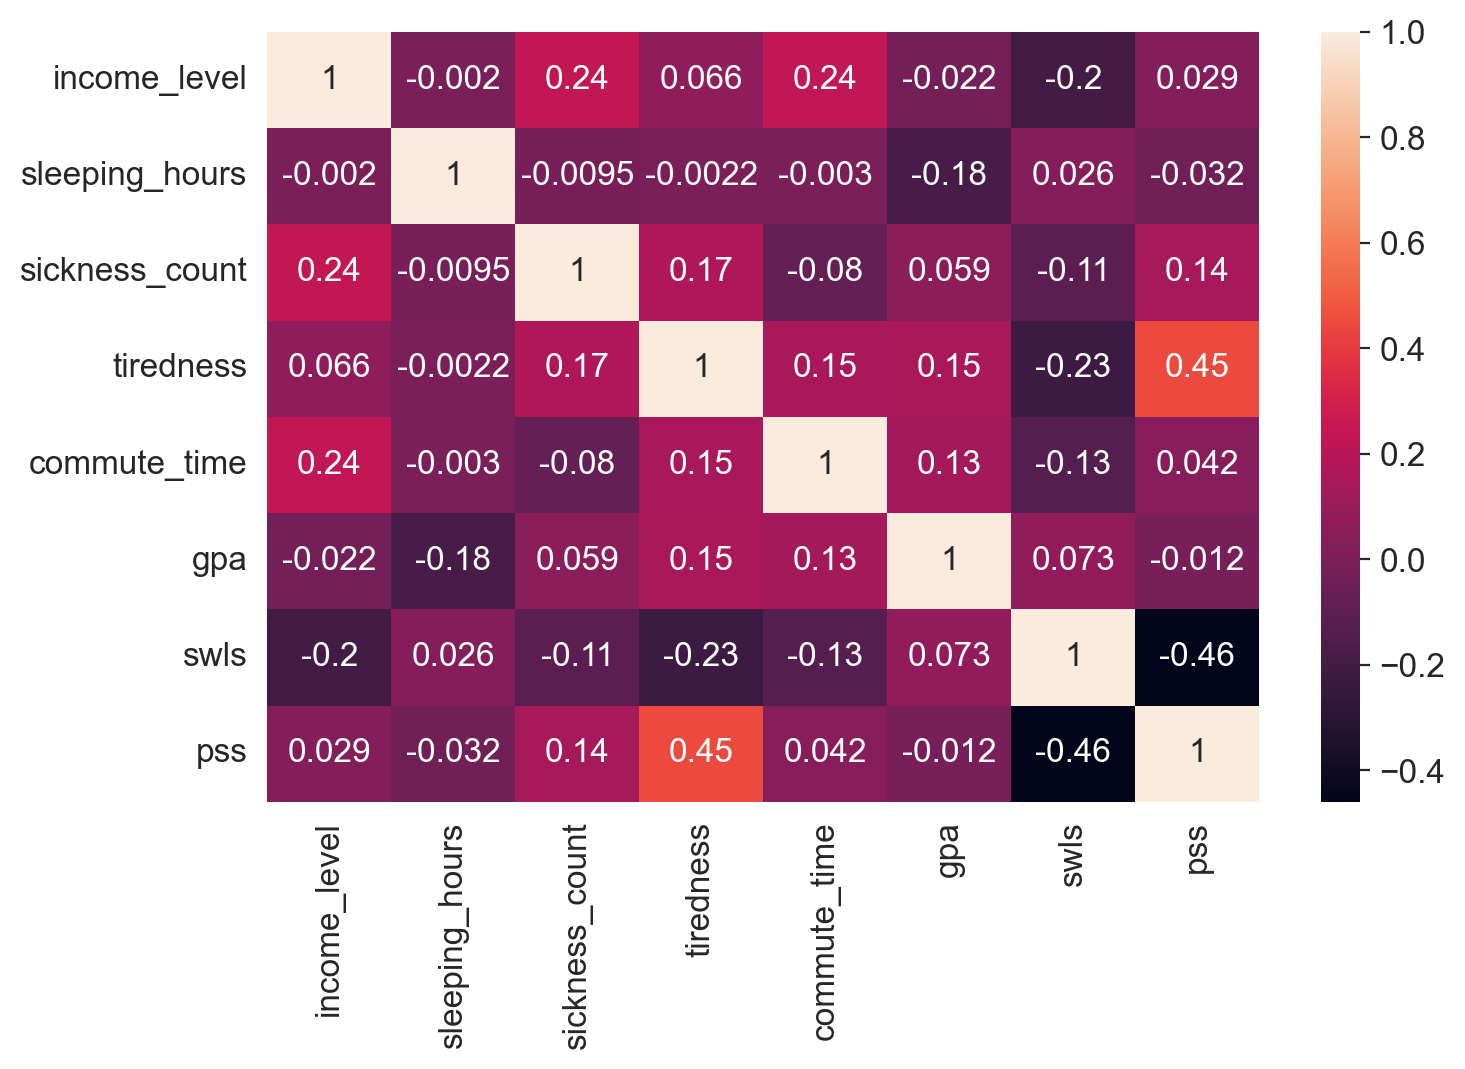

In [19]:
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

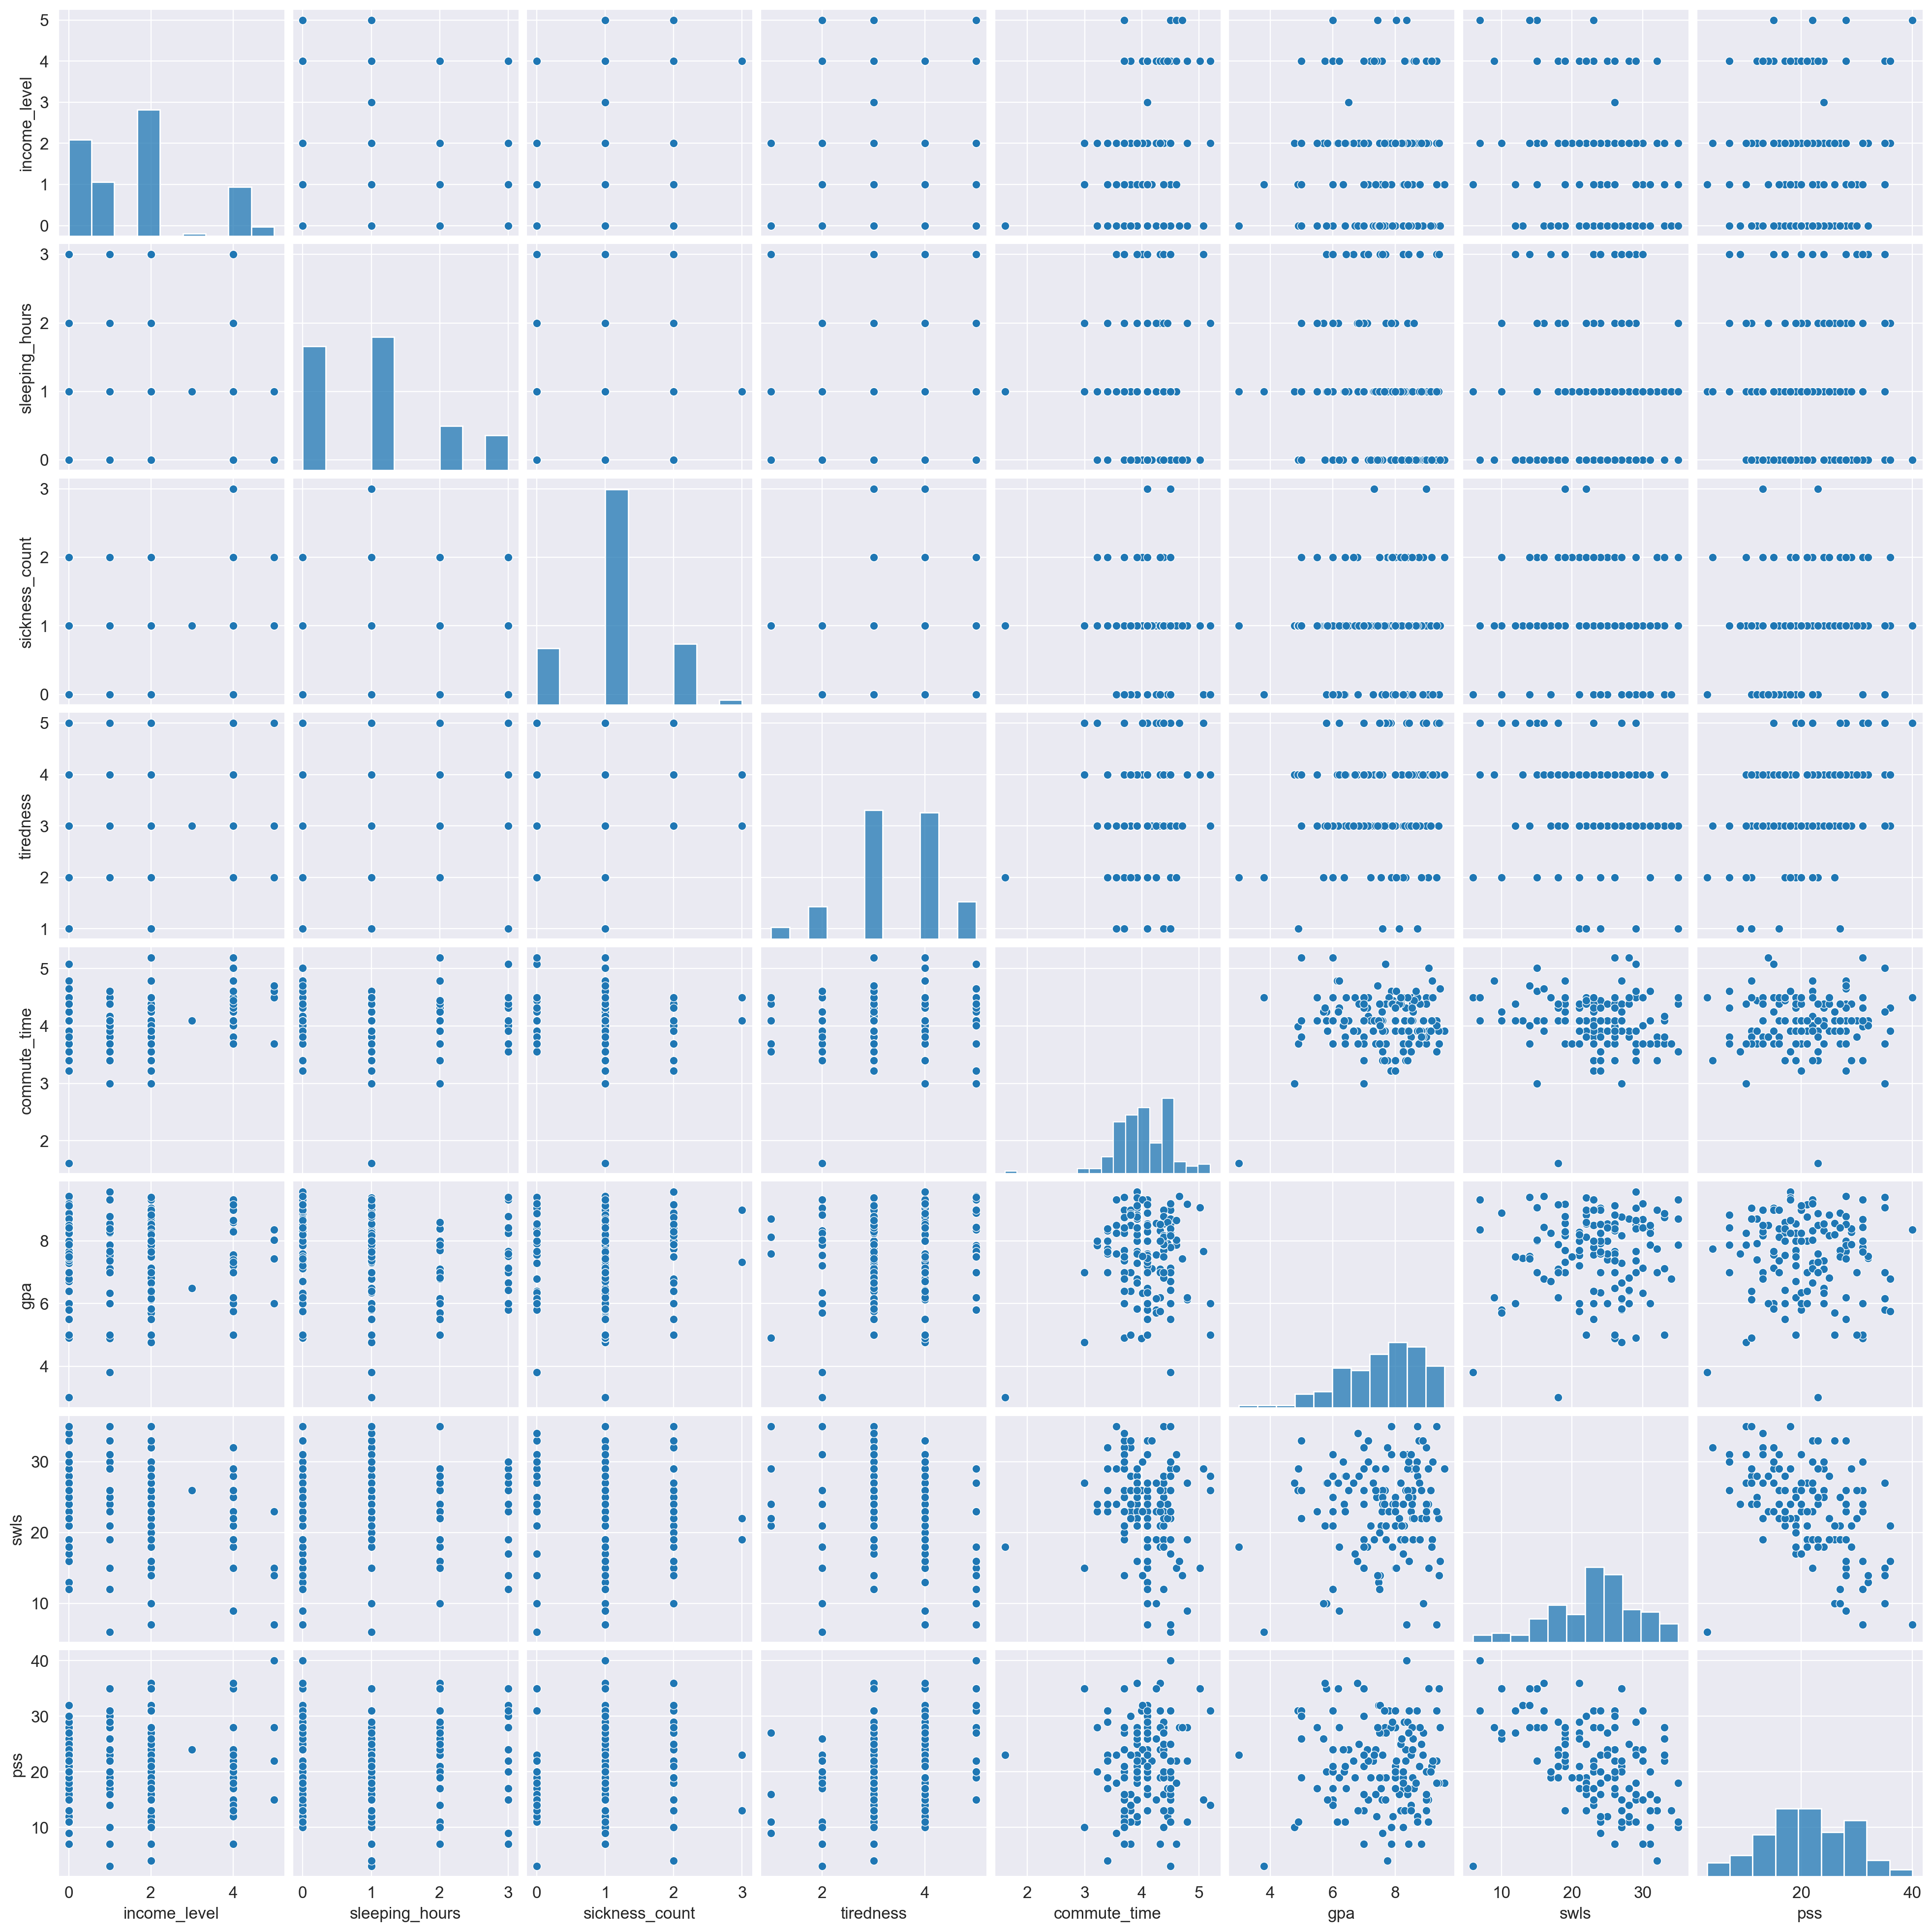

In [20]:
sns.pairplot(data=numeric_df)
plt.show()

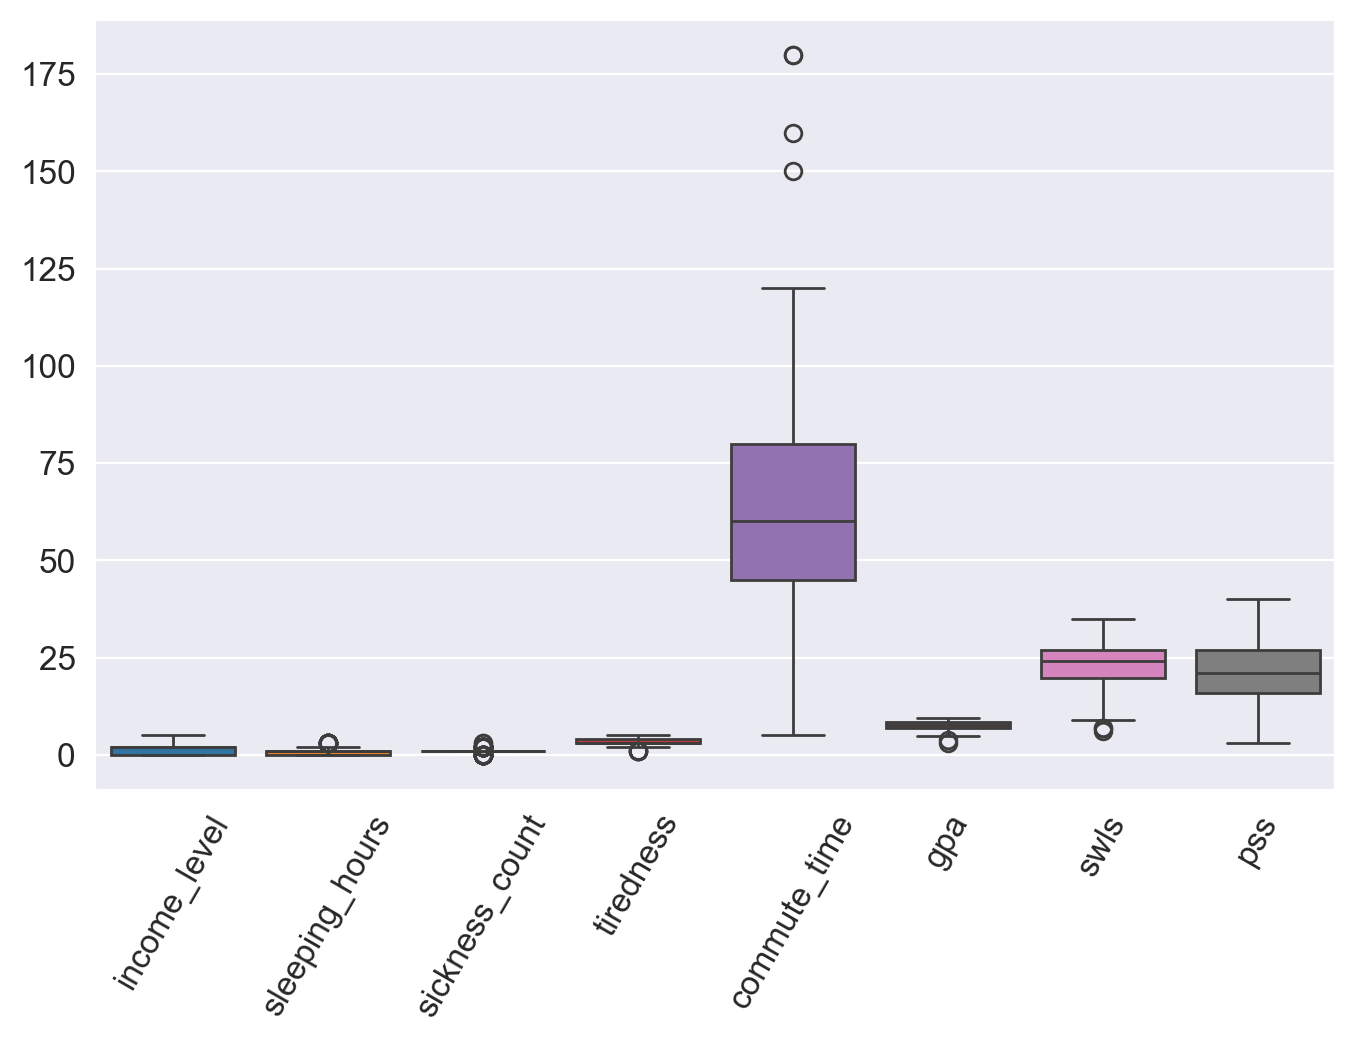

In [21]:
sns.boxplot(data=df)
plt.xticks(rotation=60)
plt.show()

# 3. Model Building

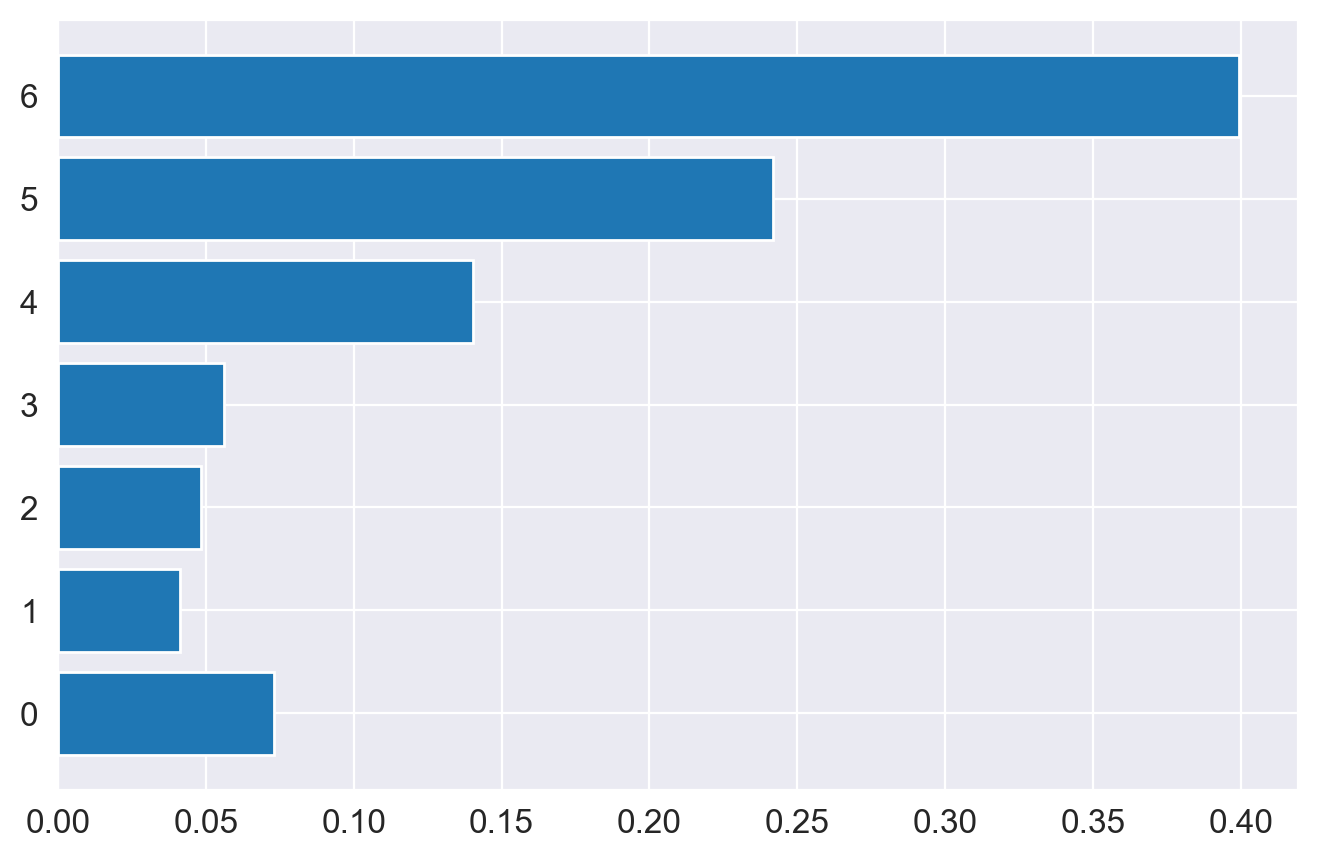

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

X = numeric_df.drop(columns='swls')
y = numeric_df['swls']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_

plt.barh(range(len(importances)), importances)
plt.show()

In [23]:
y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.2999434341180122

In [24]:
df.columns

Index(['faculty', 'income_level', 'sleeping_hours', 'sickness_count',
       'tiredness', 'commute_time', 'modes_transportation', 'gpa', 'swls',
       'pss'],
      dtype='object')

In [25]:
df['modes_transportation'] = df['modes_transportation'].str.split(', ')
exploded = df['modes_transportation'].explode()
one_hot_encoded = pd.get_dummies(exploded).groupby(level=0).max()

In [28]:
one_hot_encoded['Велосипед'] = np.where(
    (one_hot_encoded['Велосипед'] is True) or 
    (one_hot_encoded['велосипед '] is True),
    True, False)
one_hot_encoded.drop(columns=['велосипед '], inplace=True)

In [29]:
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [30]:
df_encoded.columns

Index(['faculty', 'income_level', 'sleeping_hours', 'sickness_count',
       'tiredness', 'commute_time', 'modes_transportation', 'gpa', 'swls',
       'pss', 'Автобус', 'Велосипед', 'Каршеринг', 'Личный автомобиль', 'МЦД',
       'Метро', 'Пешком', 'Самокат', 'Такси', 'Трамвай', 'Электричка',
       'маршрутка'],
      dtype='object')

In [31]:
one_hot_encoded = pd.get_dummies(df_encoded.faculty)
df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)
df_encoded.drop(columns=['faculty'], inplace=True)

In [32]:
df_encoded.drop(columns=['modes_transportation'], inplace=True)

In [33]:
df_encoded.columns

Index(['income_level', 'sleeping_hours', 'sickness_count', 'tiredness',
       'commute_time', 'gpa', 'swls', 'pss', 'Автобус', 'Велосипед',
       'Каршеринг', 'Личный автомобиль', 'МЦД', 'Метро', 'Пешком', 'Самокат',
       'Такси', 'Трамвай', 'Электричка', 'маршрутка',
       'ВШБ (Высшая школа бизнеса)',
       'МИЭМ (Московский институт электроники и математики им. А.Н. Тихонова)',
       'МИЭФ (Международный институт экономики и финансов)',
       'ФГН (Факультет гуманитарных наук)',
       'ФКИ (Факультет креативных индустрий)',
       'ФКН (Факультет компьютерных наук)',
       'ФМЭиМП (Факультет мировой экономики и политики)',
       'ФСН (Факультет социальных наук)', 'ФЭН (Факультет экономических наук)',
       'Факультет биологии и биотехнологии',
       'Факультет городского и регионального развития', 'Факультет математики',
       'Факультет права', 'Факультет физики',
       'ШИЯ (Школа иностранных языков)'],
      dtype='object')

In [ ]:
corr_matrix = df_encoded.corr()
lower_bound = 0.4
upper_bound = 1.0
masked_corr = corr_matrix.where((corr_matrix <= -lower_bound) & (corr_matrix > -upper_bound))
masked_corr = masked_corr.dropna(how='all')
masked_corr

,income_level,sleeping_hours,sickness_count,tiredness,commute_time,gpa,swls,pss,Автобус,Велосипед,...,ФКН (Факультет компьютерных наук),ФМЭиМП (Факультет мировой экономики и политики),ФСН (Факультет социальных наук),ФЭН (Факультет экономических наук),Факультет биологии и биотехнологии,Факультет городского и регионального развития,Факультет математики,Факультет права,Факультет физики,ШИЯ (Школа иностранных языков)
swls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459376,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pss,NaN,NaN,NaN,NaN,NaN,NaN,-0.459376,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Метро,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
МИЭМ (Московский институт электроники и математики им. А.Н. Тихонова),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Промежуточные результаты:
- $Corr($`tiredness`, `pss`$) = 0.45$
- $Corr($`Электричка`, `commute_time`$) = 0.54$
- $Corr($`swls`, `pss`$) = -0.46$
- $Corr($`МИЭМ`, `Метро`$) = -0.43$

In [36]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_encoded['МИЭМ (Московский институт электроники и математики им. А.Н. Тихонова)'], df_encoded['Метро'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p:.4f}")

p-value: 0.0002


In [37]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_encoded['swls'], df_encoded['pss'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p:.4f}")

p-value: 0.0000


In [38]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_encoded['commute_time'], df_encoded['Электричка'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p:.4f}")

p-value: 0.0000


In [39]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_encoded['tiredness'], df_encoded['pss'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p:.4f}")

p-value: 0.0067
